In [26]:
import pandas as pd
import numpy as np

In [27]:
data=pd.read_csv('../data/processed/crypto_data_cleaned.csv')
data.head() 

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_base_volume,taker_quote_volume
0,2023-02-26,23157.07,23689.99,23059.18,23554.85,202323.73623,2023-02-26 23:59:59.999,4.716158e+09,9506015,101003.39278,2.354572e+09
1,2023-02-27,23554.85,23897.99,23106.77,23492.09,283706.08590,2023-02-27 23:59:59.999,6.659786e+09,11754195,141360.04845,3.318354e+09
2,2023-02-28,23492.09,23600.00,23020.97,23141.57,264140.99894,2023-02-28 23:59:59.999,6.172931e+09,9568743,131200.82704,3.066250e+09
3,2023-03-01,23141.57,24000.00,23020.03,23628.97,315287.41737,2023-03-01 23:59:59.999,7.441571e+09,9390487,157961.92667,3.728257e+09
4,2023-03-02,23629.76,23796.93,23195.90,23465.32,239315.45219,2023-03-02 23:59:59.999,5.603770e+09,7435815,119522.00584,2.798798e+09


In [28]:
#check for 1 day return outliers
# check 1-day return
data['1_day_return'] = data['close'].pct_change(periods=1)
data['7_day_return'] = data['close'].pct_change(periods=7)
data[['close', '1_day_return', '7_day_return']].head(30)

,close,1_day_return,7_day_return
0,23554.85,NaN,NaN
1,23492.09,-0.002664,NaN
2,23141.57,-0.014921,NaN
3,23628.97,0.021062,NaN
4,23465.32,-0.006926,NaN
5,22354.34,-0.047346,NaN
6,22346.57,-0.000348,NaN
7,22430.24,0.003744,-0.047744
8,22410.00,-0.000902,-0.046062
9,22197.96,-0.009462,-0.040776


In [29]:
#check for 7 day return outliers
# check 7-day return
data['1_day_return'] = data['close'].pct_change(periods=7)
data[['close', '1_day_return']].head(30)

,close,1_day_return
0,23554.85,NaN
1,23492.09,NaN
2,23141.57,NaN
3,23628.97,NaN
4,23465.32,NaN
5,22354.34,NaN
6,22346.57,NaN
7,22430.24,-0.047744
8,22410.00,-0.046062
9,22197.96,-0.040776


In [30]:
#-   Rolling volatility
data['7_day_volatility'] = data['close'].rolling(window=7).std()
data[['close', '7_day_volatility']].head(30)

,close,7_day_volatility
0,23554.85,NaN
1,23492.09,NaN
2,23141.57,NaN
3,23628.97,NaN
4,23465.32,NaN
5,22354.34,NaN
6,22346.57,560.919773
7,22430.24,583.089264
8,22410.00,567.901108
9,22197.96,591.801562


In [31]:
#Rolling volatility
#    → Most common choices in crypto quant work:
#       • 7-day rolling std of daily log returns  (short-term vol)
#       • 30-day rolling std of daily log returns (medium-term vol)
#    → Annualized by multiplying by sqrt(365)
data['30_day_volatility'] = data['close'].rolling(window=30).std()
data[['close', '30_day_volatility']].head(30)
data['30_day_volatility_annualized'] = data['30_day_volatility'] * np.sqrt(365)
data[['close', '30_day_volatility_annualized']].head(30) 

,close,30_day_volatility_annualized
0,23554.85,NaN
1,23492.09,NaN
2,23141.57,NaN
3,23628.97,NaN
4,23465.32,NaN
5,22354.34,NaN
6,22346.57,NaN
7,22430.24,NaN
8,22410.00,NaN
9,22197.96,NaN


In [32]:
!pip install ta

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [33]:
# checking the rolling volatility
data['7_day_volatility'] = data['1_day_return'].rolling(window=7).std()
data['30_day_volatility'] = data['1_day_return'].rolling(window=30).std()
data[['1_day_return', '7_day_volatility','30_day_volatility']].tail(30)

,1_day_return,7_day_volatility,30_day_volatility
970,0.017412,0.024868,0.068788
971,0.042969,0.035769,0.069423
972,0.041622,0.041874,0.069065
973,0.054459,0.042337,0.069325
974,0.032349,0.037607,0.068920
975,0.042483,0.027919,0.069119
976,0.022812,0.012878,0.069181
977,-0.015946,0.023127,0.069212
978,-0.012584,0.027640,0.068751
979,-0.013867,0.029504,0.065837


In [34]:
# Using `ta` or `ta-lib`

# RSI
# MACD
# Moving averages (SMA20, SMA50, SMA200)
# Bollinger Bands
# Stochastic Oscillator

import ta  # make sure ta is installed: pip install ta

# RSI
data['rsi'] = ta.momentum.RSIIndicator(data['close']).rsi()

# MACD
data['macd'] = ta.trend.MACD(data['close']).macd()

# Simple Moving Averages
data['sma20'] = ta.trend.SMAIndicator(data['close'], window=20).sma_indicator()
data['sma50'] = ta.trend.SMAIndicator(data['close'], window=50).sma_indicator()
data['sma200'] = ta.trend.SMAIndicator(data['close'], window=200).sma_indicator()

# Bollinger Bands
bb_indicator = ta.volatility.BollingerBands(data['close'])
data['bb_high'] = bb_indicator.bollinger_hband()
data['bb_low'] = bb_indicator.bollinger_lband()

# Stochastic Oscillator
data['stochastic_oscillator'] = ta.momentum.StochasticOscillator(
    high=data['high'],
    low=data['low'],
    close=data['close']
).stoch()

data.tail()


,open_time,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_base_volume,...,30_day_volatility,30_day_volatility_annualized,rsi,macd,sma20,sma50,sma200,bb_high,bb_low,stochastic_oscillator
995,2025-11-17,94261.45,96043.00,91220.00,92215.14,39218.59806,2025-11-17 23:59:59.999,3.674562e+09,8134322,18690.19245,...,0.047909,115813.529683,28.830303,-4256.195101,102968.0365,109887.8414,110423.54295,113836.973973,92099.099027,6.112654
996,2025-11-18,92215.14,93836.01,89253.78,92960.83,39835.14769,2025-11-18 23:59:59.999,3.641033e+09,8786593,20130.95957,...,0.049341,123340.385954,30.755973,-4429.984767,102115.0135,109460.8188,110403.91140,113308.867538,90921.159462,20.316811
997,2025-11-19,92960.83,92980.22,88608.00,91554.96,32286.63760,2025-11-19 23:59:59.999,2.925774e+09,6822174,15060.08451,...,0.050908,130383.114401,29.154345,-4627.809778,101276.6175,109010.9394,110382.40410,112984.997469,89568.237531,15.598984
998,2025-11-20,91554.96,93160.00,86100.00,86637.23,39733.19073,2025-11-20 23:59:59.999,3.548950e+09,7841395,18283.84047,...,0.053994,143596.216920,24.373044,-5122.359860,100128.0785,108371.7842,110344.20215,112808.358751,87447.798249,2.510421
999,2025-11-21,86637.22,87498.94,81648.00,82956.37,35825.62756,2025-11-21 23:59:59.999,3.016015e+09,5270926,16070.69226,...,0.056300,160067.925800,21.527266,-5745.083260,98770.9920,107620.3246,110285.31560,112646.006270,84895.977730,5.061001


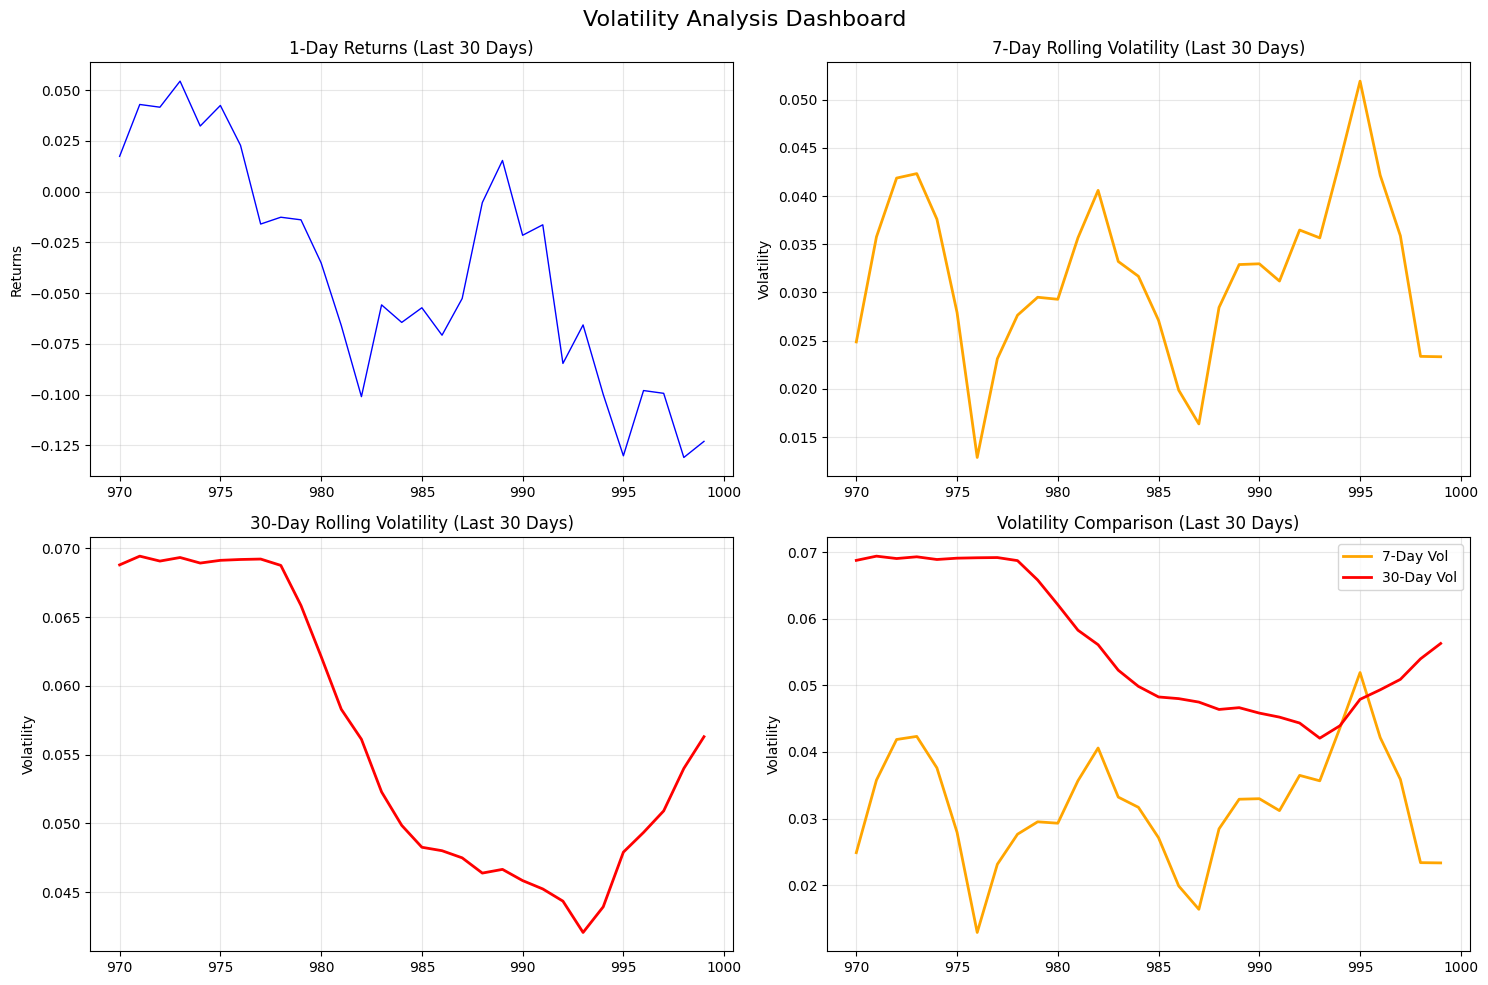

Latest 30 days of data:


,1_day_return,7_day_volatility,30_day_volatility
970,0.017412,0.024868,0.068788
971,0.042969,0.035769,0.069423
972,0.041622,0.041874,0.069065
973,0.054459,0.042337,0.069325
974,0.032349,0.037607,0.068920
975,0.042483,0.027919,0.069119
976,0.022812,0.012878,0.069181
977,-0.015946,0.023127,0.069212
978,-0.012584,0.027640,0.068751
979,-0.013867,0.029504,0.065837


In [35]:
import matplotlib.pyplot as plt

# Calculate the volatility metrics
data['7_day_volatility'] = data['1_day_return'].rolling(window=7).std()
data['30_day_volatility'] = data['1_day_return'].rolling(window=30).std()

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Volatility Analysis Dashboard', fontsize=16)

# Plot 1: Daily Returns
axes[0,0].plot(data['1_day_return'].tail(30), color='blue', linewidth=1)
axes[0,0].set_title('1-Day Returns (Last 30 Days)')
axes[0,0].set_ylabel('Returns')
axes[0,0].grid(True, alpha=0.3)

# Plot 2: 7-Day Volatility
axes[0,1].plot(data['7_day_volatility'].tail(30), color='orange', linewidth=2)
axes[0,1].set_title('7-Day Rolling Volatility (Last 30 Days)')
axes[0,1].set_ylabel('Volatility')
axes[0,1].grid(True, alpha=0.3)

# Plot 3: 30-Day Volatility
axes[1,0].plot(data['30_day_volatility'].tail(30), color='red', linewidth=2)
axes[1,0].set_title('30-Day Rolling Volatility (Last 30 Days)')
axes[1,0].set_ylabel('Volatility')
axes[1,0].grid(True, alpha=0.3)

# Plot 4: All metrics together
axes[1,1].plot(data['7_day_volatility'].tail(30), color='orange', linewidth=2, label='7-Day Vol')
axes[1,1].plot(data['30_day_volatility'].tail(30), color='red', linewidth=2, label='30-Day Vol')
axes[1,1].set_title('Volatility Comparison (Last 30 Days)')
axes[1,1].set_ylabel('Volatility')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display the data table
print("Latest 30 days of data:")
display(data[['1_day_return', '7_day_volatility','30_day_volatility']].tail(30))

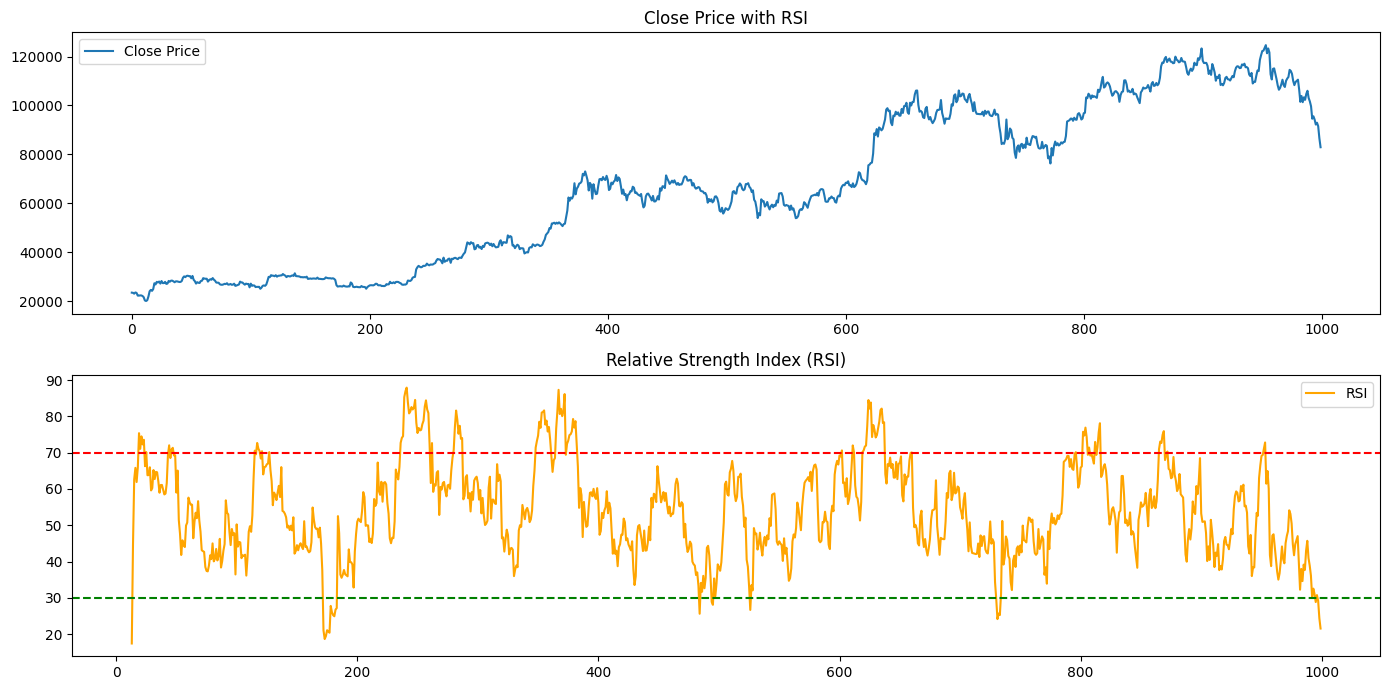

In [36]:
#visualize the features of rsi
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
plt.subplot(2,1,1)
plt.plot(data['close'], label='Close Price')
plt.title('Close Price with RSI')
plt.legend()
plt.subplot(2,1,2)
plt.plot(data['rsi'], label='RSI', color='orange')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.tight_layout()
plt.show()

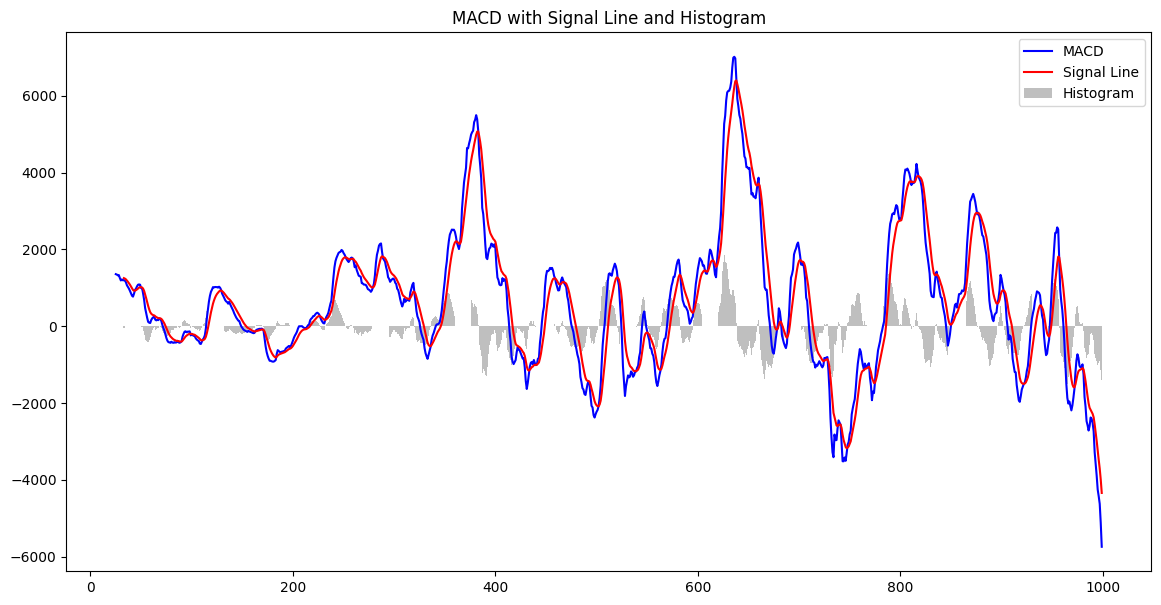

In [37]:
#plot macd with signal and histogram
plt.figure(figsize=(14,7))
plt.plot(data['macd'], label='MACD', color='blue')
macd_full = ta.trend.MACD(data['close'])
plt.plot(macd_full.macd_signal(), label='Signal Line', color='red')
plt.bar(data.index, macd_full.macd_diff(), label='Histogram', color='gray', alpha=0.5)
plt.title('MACD with Signal Line and Histogram')
plt.legend()
plt.show()

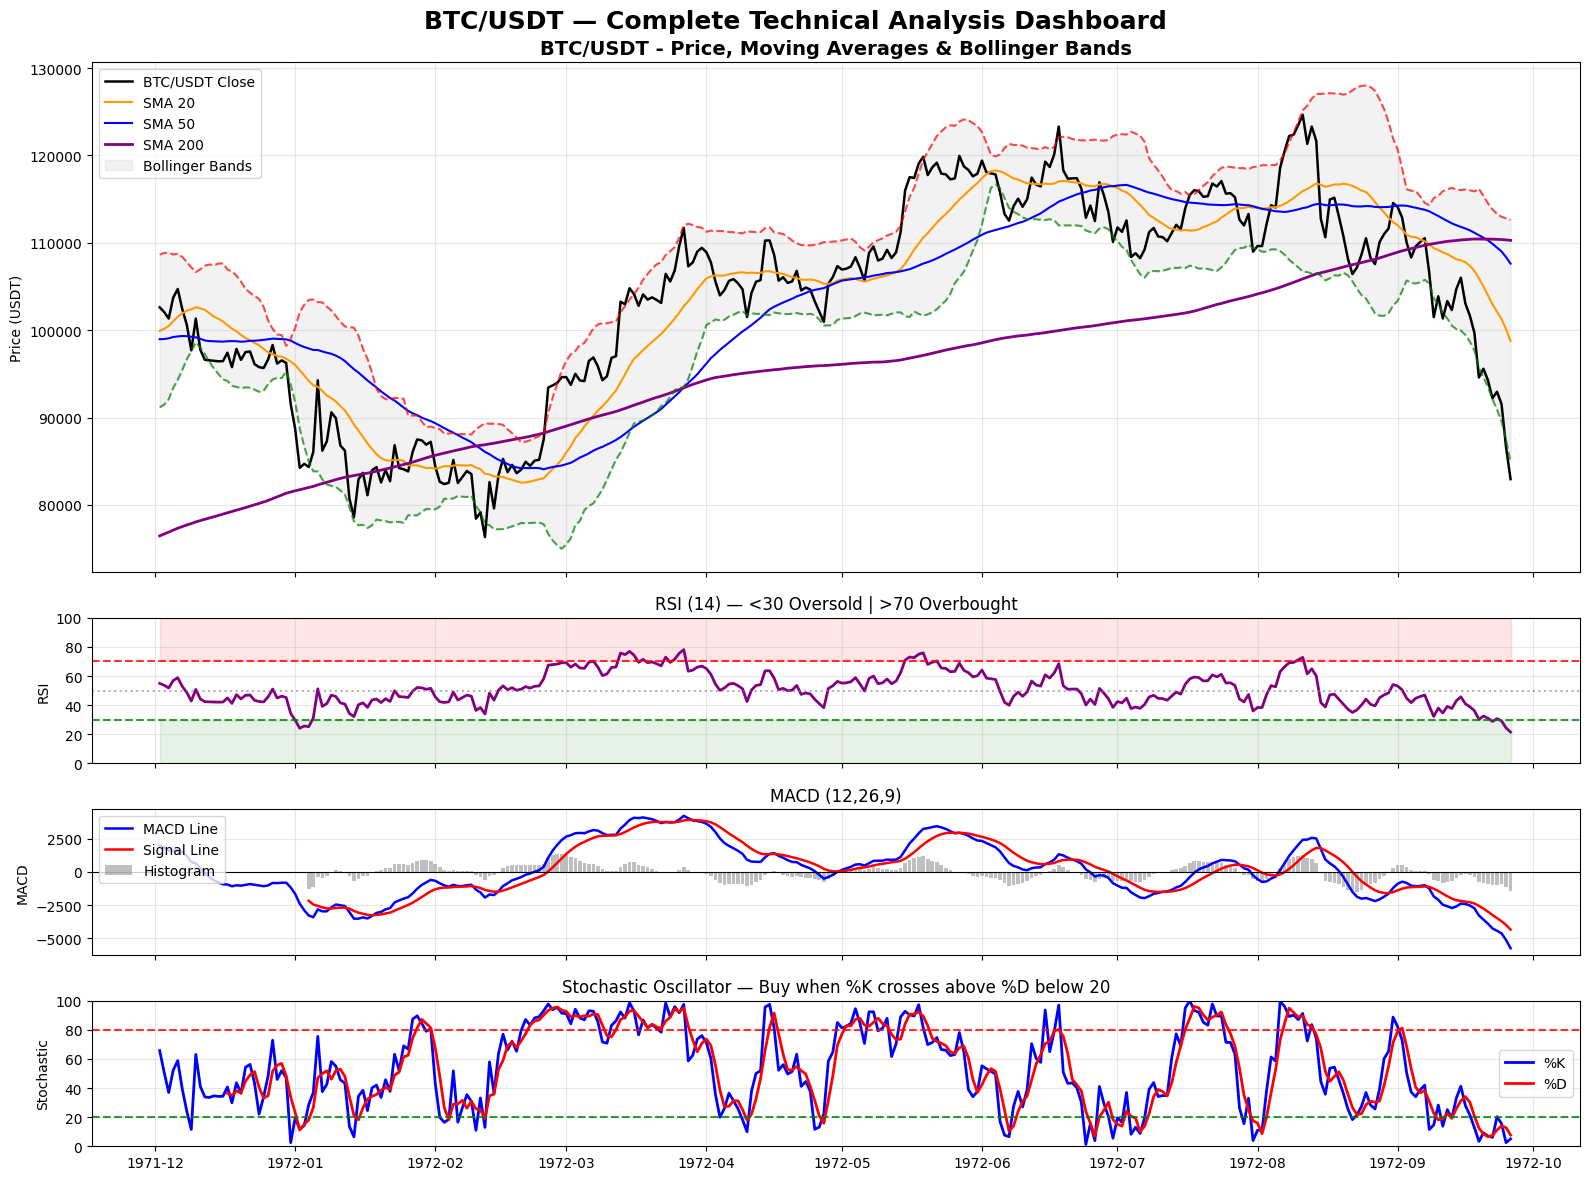

In [38]:
# ========================================================
# PROFESSIONAL TECHNICAL INDICATORS CHART (All in One!)
# ========================================================

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Use only the last 6-12 months for clarity (optional)
data_plot = data.tail(300).copy()  # ~300 days

# Create 4-panel chart
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16, 12), 
                                         sharex=True, gridspec_kw={'height_ratios': [3.5, 1, 1, 1]})

# -----------------------------
# 1. Price + SMA + Bollinger Bands
# -----------------------------
ax1.plot(data_plot.index, data_plot['close'], label='BTC/USDT Close', color='black', linewidth=1.8)
ax1.plot(data_plot.index, data_plot['sma20'], label='SMA 20', color='#ff9900', linewidth=1.5)
ax1.plot(data_plot.index, data_plot['sma50'], label='SMA 50', color='blue', linewidth=1.5)
ax1.plot(data_plot.index, data_plot['sma200'], label='SMA 200', color='purple', linewidth=2)

# Bollinger Bands
ax1.plot(data_plot.index, data_plot['bb_high'], color='red', alpha=0.7, linestyle='--')
ax1.plot(data_plot.index, data_plot['bb_low'], color='green', alpha=0.7, linestyle='--')
ax1.fill_between(data_plot.index, data_plot['bb_low'], data_plot['bb_high'], 
                 color='gray', alpha=0.1, label='Bollinger Bands')

ax1.set_title('BTC/USDT - Price, Moving Averages & Bollinger Bands', fontsize=14, fontweight='bold')
ax1.set_ylabel('Price (USDT)')
ax1.legend(loc='upper left')
ax1.grid(alpha=0.3)

# -----------------------------
# 2. RSI
# -----------------------------
ax2.plot(data_plot.index, data_plot['rsi'], color='purple', linewidth=2)
ax2.axhline(70, color='red', linestyle='--', alpha=0.8)
ax2.axhline(30, color='green', linestyle='--', alpha=0.8)
ax2.axhline(50, color='gray', linestyle=':', alpha=0.6)
ax2.fill_between(data_plot.index, 70, 100, color='red', alpha=0.1)
ax2.fill_between(data_plot.index, 0, 30, color='green', alpha=0.1)
ax2.set_ylim(0, 100)
ax2.set_ylabel('RSI')
ax2.set_title('RSI (14) — <30 Oversold | >70 Overbought')
ax2.grid(alpha=0.3)

# -----------------------------
# 3. MACD
# -----------------------------
ax3.plot(data_plot.index, data_plot['macd'], label='MACD Line', color='blue', linewidth=1.8)
# Note: ta.trend.MACD() also gives signal & hist — let's add them properly
macd_full = ta.trend.MACD(data_plot['close'])
ax3.plot(data_plot.index, macd_full.macd_signal(), label='Signal Line', color='red', linewidth=1.8)
ax3.bar(data_plot.index, macd_full.macd_diff(), label='Histogram', color='gray', alpha=0.5, width=0.8)
ax3.axhline(0, color='black', linewidth=0.8)
ax3.set_ylabel('MACD')
ax3.set_title('MACD (12,26,9)')
ax3.legend(loc='upper left')
ax3.grid(alpha=0.3)

# -----------------------------
# 4. Stochastic Oscillator
# -----------------------------
ax4.plot(data_plot.index, data_plot['stochastic_oscillator'], label='%K', color='blue', linewidth=2)
# Add %D (signal line) — 3-period SMA of %K
stoch = ta.momentum.StochasticOscillator(data_plot['high'], data_plot['low'], data_plot['close'])
ax4.plot(data_plot.index, stoch.stoch_signal(), label='%D', color='red', linewidth=2)
ax4.axhline(80, color='red', linestyle='--', alpha=0.8)
ax4.axhline(20, color='green', linestyle='--', alpha=0.8)
ax4.set_ylim(0, 100)
ax4.set_ylabel('Stochastic')
ax4.set_title('Stochastic Oscillator — Buy when %K crosses above %D below 20')
ax4.legend()
ax4.grid(alpha=0.3)

# Format x-axis nicely
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax4.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=0)

# Main title
plt.suptitle('BTC/USDT — Complete Technical Analysis Dashboard', fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

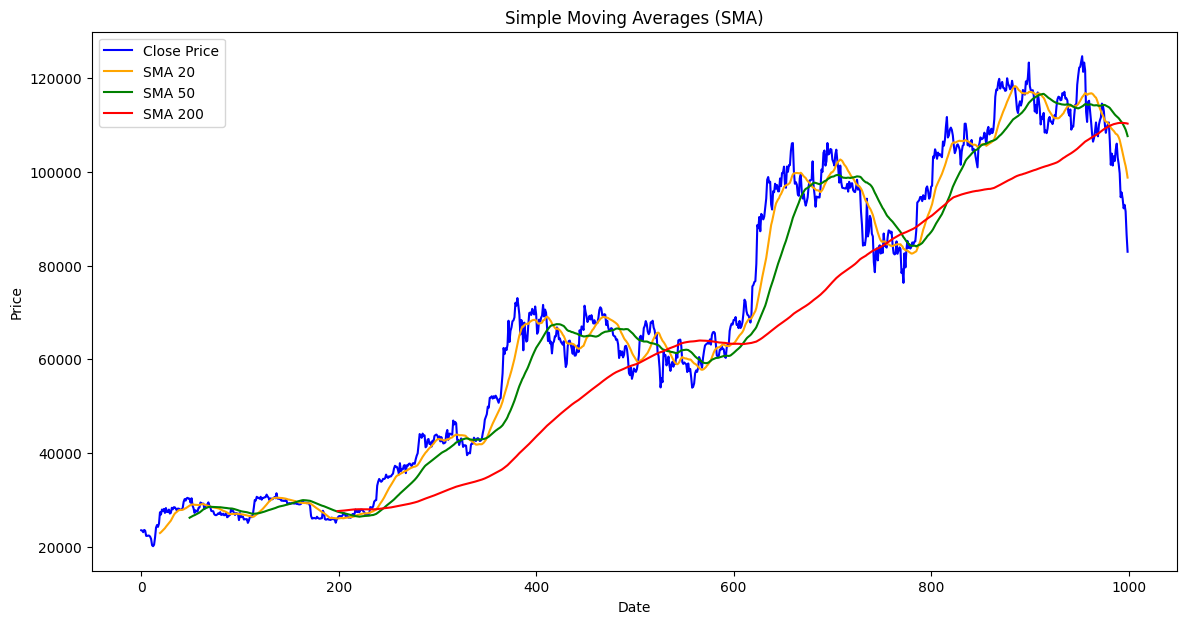

In [39]:
# Visualize the sma20, sma50, sma200 features
plt.figure(figsize=(14,7))
plt.plot(data['close'], label='Close Price', color='blue')  
plt.plot(data['sma20'], label='SMA 20', color='orange')
plt.plot(data['sma50'], label='SMA 50', color='green')
plt.plot(data['sma200'], label='SMA 200', color='red')
plt.title('Simple Moving Averages (SMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

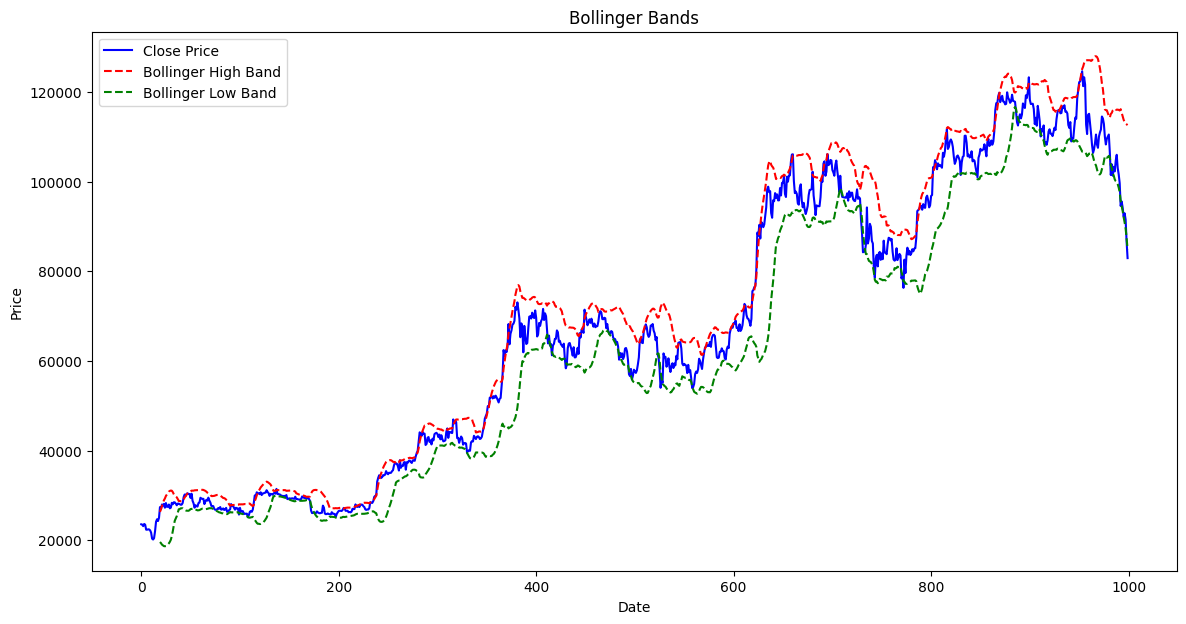

In [40]:
# visualize the bollinger bands
plt.figure(figsize=(14,7))
plt.plot(data['close'], label='Close Price', color='blue')
plt.plot(data['bb_high'], label='Bollinger High Band', color='red', linestyle='--')
plt.plot(data['bb_low'], label='Bollinger Low Band', color='green', linestyle='--')
plt.title('Bollinger Bands')   
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

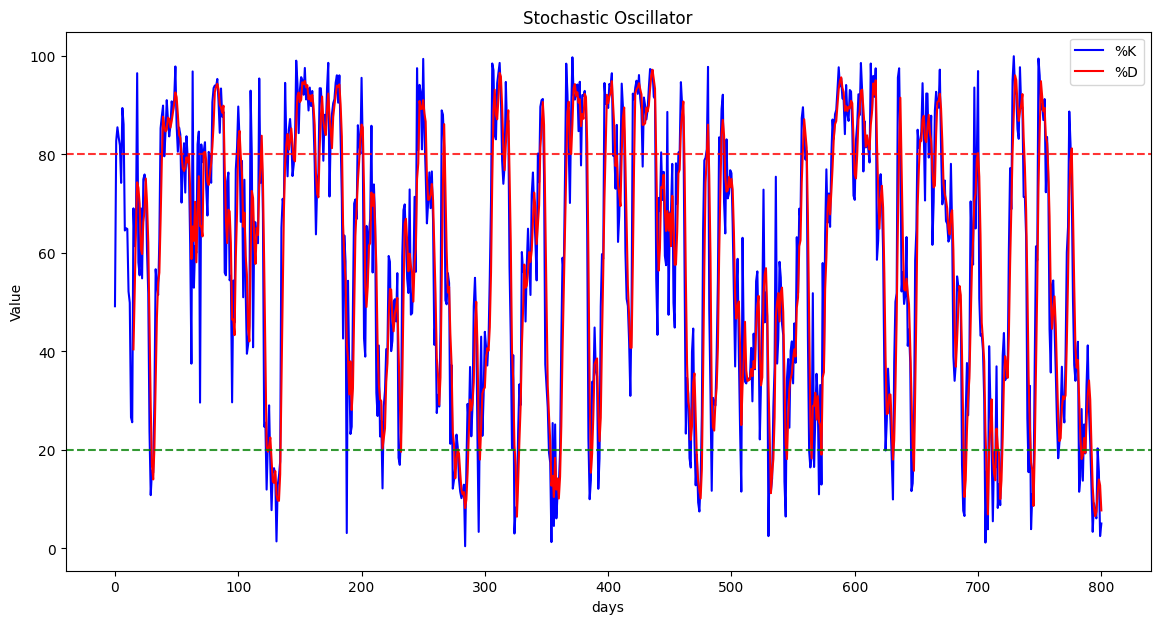

In [49]:
#visualize the stochastic oscillator with %k and %d
plt.figure(figsize=(14,7))
plt.plot(data['stochastic_oscillator'], label='%K', color='blue') 
stoch = ta.momentum.StochasticOscillator(data['high'], data['low'], data['close'])
plt.plot(stoch.stoch_signal(), label='%D', color='red')
plt.axhline(80, color='red', linestyle='--', alpha=0.8)
plt.axhline(20, color='green', linestyle='--', alpha=0.8)
plt.title('Stochastic Oscillator')
plt.xlabel('days')
plt.ylabel('Value')
plt.legend()
plt.show()

In [50]:

data.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_base_volume,...,7_day_volatility,30_day_volatility,rsi,macd,sma20,sma50,sma200,bb_high,bb_low,stochastic_oscillator
0,2023-09-13,25840.10,26405.22,25764.17,26222.00,31610.82753,2023-09-13 23:59:59.999,8.254379e+08,714880,15287.00038,...,0.013958,0.048532,47.503161,-448.682115,26070.6720,27516.6508,27645.68585,27132.658711,25008.685289,49.171602
1,2023-09-14,26222.00,26860.49,26126.77,26522.73,38333.17250,2023-09-14 23:59:59.999,1.015267e+09,799278,19440.45467,...,0.013719,0.049027,50.937342,-369.883285,26093.8080,27460.0662,27660.52525,27173.865049,25013.750951,82.762862
2,2023-09-15,26522.73,26888.00,26224.00,26600.00,26227.29369,2023-09-15 23:59:59.999,6.952033e+08,654094,12600.39115,...,0.016923,0.050024,51.809648,-297.767128,26122.9395,27407.6106,27676.06480,27224.395884,25021.483116,85.505788
3,2023-09-16,26599.99,26777.00,26445.00,26559.67,13960.93351,2023-09-16 23:59:59.999,3.708899e+08,526416,6508.91352,...,0.018670,0.049059,51.297008,-241.089716,26145.8345,27352.5212,27693.15530,27263.495682,25028.173318,83.476095
4,2023-09-17,26559.67,26623.25,26399.00,26527.51,12998.10277,2023-09-17 23:59:59.999,3.447037e+08,476775,6359.89459,...,0.019002,0.046573,50.864802,-196.502344,26166.2100,27296.0134,27707.64800,27296.036371,25036.383629,81.857574


In [51]:
data.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_base_volume,...,7_day_volatility,30_day_volatility,rsi,macd,sma20,sma50,sma200,bb_high,bb_low,stochastic_oscillator
0,2023-09-13,25840.10,26405.22,25764.17,26222.00,31610.82753,2023-09-13 23:59:59.999,8.254379e+08,714880,15287.00038,...,0.013958,0.048532,47.503161,-448.682115,26070.6720,27516.6508,27645.68585,27132.658711,25008.685289,49.171602
1,2023-09-14,26222.00,26860.49,26126.77,26522.73,38333.17250,2023-09-14 23:59:59.999,1.015267e+09,799278,19440.45467,...,0.013719,0.049027,50.937342,-369.883285,26093.8080,27460.0662,27660.52525,27173.865049,25013.750951,82.762862
2,2023-09-15,26522.73,26888.00,26224.00,26600.00,26227.29369,2023-09-15 23:59:59.999,6.952033e+08,654094,12600.39115,...,0.016923,0.050024,51.809648,-297.767128,26122.9395,27407.6106,27676.06480,27224.395884,25021.483116,85.505788
3,2023-09-16,26599.99,26777.00,26445.00,26559.67,13960.93351,2023-09-16 23:59:59.999,3.708899e+08,526416,6508.91352,...,0.018670,0.049059,51.297008,-241.089716,26145.8345,27352.5212,27693.15530,27263.495682,25028.173318,83.476095
4,2023-09-17,26559.67,26623.25,26399.00,26527.51,12998.10277,2023-09-17 23:59:59.999,3.447037e+08,476775,6359.89459,...,0.019002,0.046573,50.864802,-196.502344,26166.2100,27296.0134,27707.64800,27296.036371,25036.383629,81.857574


In [45]:
#drop rows with NaN values
data = data.dropna().reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   open_time                     801 non-null    object 
 1   open                          801 non-null    float64
 2   high                          801 non-null    float64
 3   low                           801 non-null    float64
 4   close                         801 non-null    float64
 5   volume                        801 non-null    float64
 6   close_time                    801 non-null    object 
 7   quote_asset_volume            801 non-null    float64
 8   num_trades                    801 non-null    int64  
 9   taker_base_volume             801 non-null    float64
 10  taker_quote_volume            801 non-null    float64
 11  1_day_return                  801 non-null    float64
 12  7_day_return                  801 non-null    float64
 13  7_day

In [46]:
#drop 7 day return  column
data = data.drop(columns=['7_day_return'])  
data.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_base_volume,...,30_day_volatility,30_day_volatility_annualized,rsi,macd,sma20,sma50,sma200,bb_high,bb_low,stochastic_oscillator
0,2023-09-13,25840.10,26405.22,25764.17,26222.00,31610.82753,2023-09-13 23:59:59.999,8.254379e+08,714880,15287.00038,...,0.048532,16391.241512,47.503161,-448.682115,26070.6720,27516.6508,27645.68585,27132.658711,25008.685289,49.171602
1,2023-09-14,26222.00,26860.49,26126.77,26522.73,38333.17250,2023-09-14 23:59:59.999,1.015267e+09,799278,19440.45467,...,0.049027,12675.981035,50.937342,-369.883285,26093.8080,27460.0662,27660.52525,27173.865049,25013.750951,82.762862
2,2023-09-15,26522.73,26888.00,26224.00,26600.00,26227.29369,2023-09-15 23:59:59.999,6.952033e+08,654094,12600.39115,...,0.050024,8997.929438,51.809648,-297.767128,26122.9395,27407.6106,27676.06480,27224.395884,25021.483116,85.505788
3,2023-09-16,26599.99,26777.00,26445.00,26559.67,13960.93351,2023-09-16 23:59:59.999,3.708899e+08,526416,6508.91352,...,0.049059,8957.781404,51.297008,-241.089716,26145.8345,27352.5212,27693.15530,27263.495682,25028.173318,83.476095
4,2023-09-17,26559.67,26623.25,26399.00,26527.51,12998.10277,2023-09-17 23:59:59.999,3.447037e+08,476775,6359.89459,...,0.046573,9051.550856,50.864802,-196.502344,26166.2100,27296.0134,27707.64800,27296.036371,25036.383629,81.857574


In [47]:
#drop 30_day_volatility_annualized
data = data.drop(columns=['30_day_volatility_annualized'])
data.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_base_volume,...,7_day_volatility,30_day_volatility,rsi,macd,sma20,sma50,sma200,bb_high,bb_low,stochastic_oscillator
0,2023-09-13,25840.10,26405.22,25764.17,26222.00,31610.82753,2023-09-13 23:59:59.999,8.254379e+08,714880,15287.00038,...,0.013958,0.048532,47.503161,-448.682115,26070.6720,27516.6508,27645.68585,27132.658711,25008.685289,49.171602
1,2023-09-14,26222.00,26860.49,26126.77,26522.73,38333.17250,2023-09-14 23:59:59.999,1.015267e+09,799278,19440.45467,...,0.013719,0.049027,50.937342,-369.883285,26093.8080,27460.0662,27660.52525,27173.865049,25013.750951,82.762862
2,2023-09-15,26522.73,26888.00,26224.00,26600.00,26227.29369,2023-09-15 23:59:59.999,6.952033e+08,654094,12600.39115,...,0.016923,0.050024,51.809648,-297.767128,26122.9395,27407.6106,27676.06480,27224.395884,25021.483116,85.505788
3,2023-09-16,26599.99,26777.00,26445.00,26559.67,13960.93351,2023-09-16 23:59:59.999,3.708899e+08,526416,6508.91352,...,0.018670,0.049059,51.297008,-241.089716,26145.8345,27352.5212,27693.15530,27263.495682,25028.173318,83.476095
4,2023-09-17,26559.67,26623.25,26399.00,26527.51,12998.10277,2023-09-17 23:59:59.999,3.447037e+08,476775,6359.89459,...,0.019002,0.046573,50.864802,-196.502344,26166.2100,27296.0134,27707.64800,27296.036371,25036.383629,81.857574


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   open_time              801 non-null    object 
 1   open                   801 non-null    float64
 2   high                   801 non-null    float64
 3   low                    801 non-null    float64
 4   close                  801 non-null    float64
 5   volume                 801 non-null    float64
 6   close_time             801 non-null    object 
 7   quote_asset_volume     801 non-null    float64
 8   num_trades             801 non-null    int64  
 9   taker_base_volume      801 non-null    float64
 10  taker_quote_volume     801 non-null    float64
 11  1_day_return           801 non-null    float64
 12  7_day_volatility       801 non-null    float64
 13  30_day_volatility      801 non-null    float64
 14  rsi                    801 non-null    float64
 15  macd  

In [53]:
#save the data to a new csv file
data.to_csv('../data/processed/crypto_data_feature_engineered.csv', index=False)